In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})
df = df.drop(["CustomerID"],axis=1)

In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [ ]:
Scaler = StandardScaler()
Scaler.fit(df)
new_data = Scaler.transform(df)

In [ ]:
KMeans_2 = KMeans(n_clusters=2,n_init=12)
KMeans_2.fit(new_data)
clusters_2 = KMeans_2.labels_

In [ ]:
df_2 = df.copy()
df_2['Class'] = clusters_2
df_2

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,1
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,0
197,0,32,126,74,1
198,0,32,137,18,0


<Axes: >

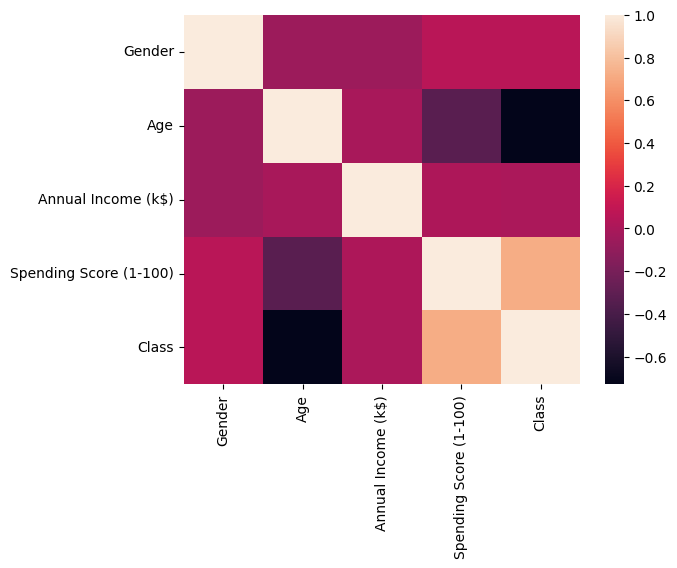

In [ ]:
sns.heatmap(df_2.corr())

In [ ]:
df_2.groupby('Class').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Class,,,,
0,0.533981,48.728155,60.495146,32.184466
1,0.587629,28.360825,60.628866,69.329897


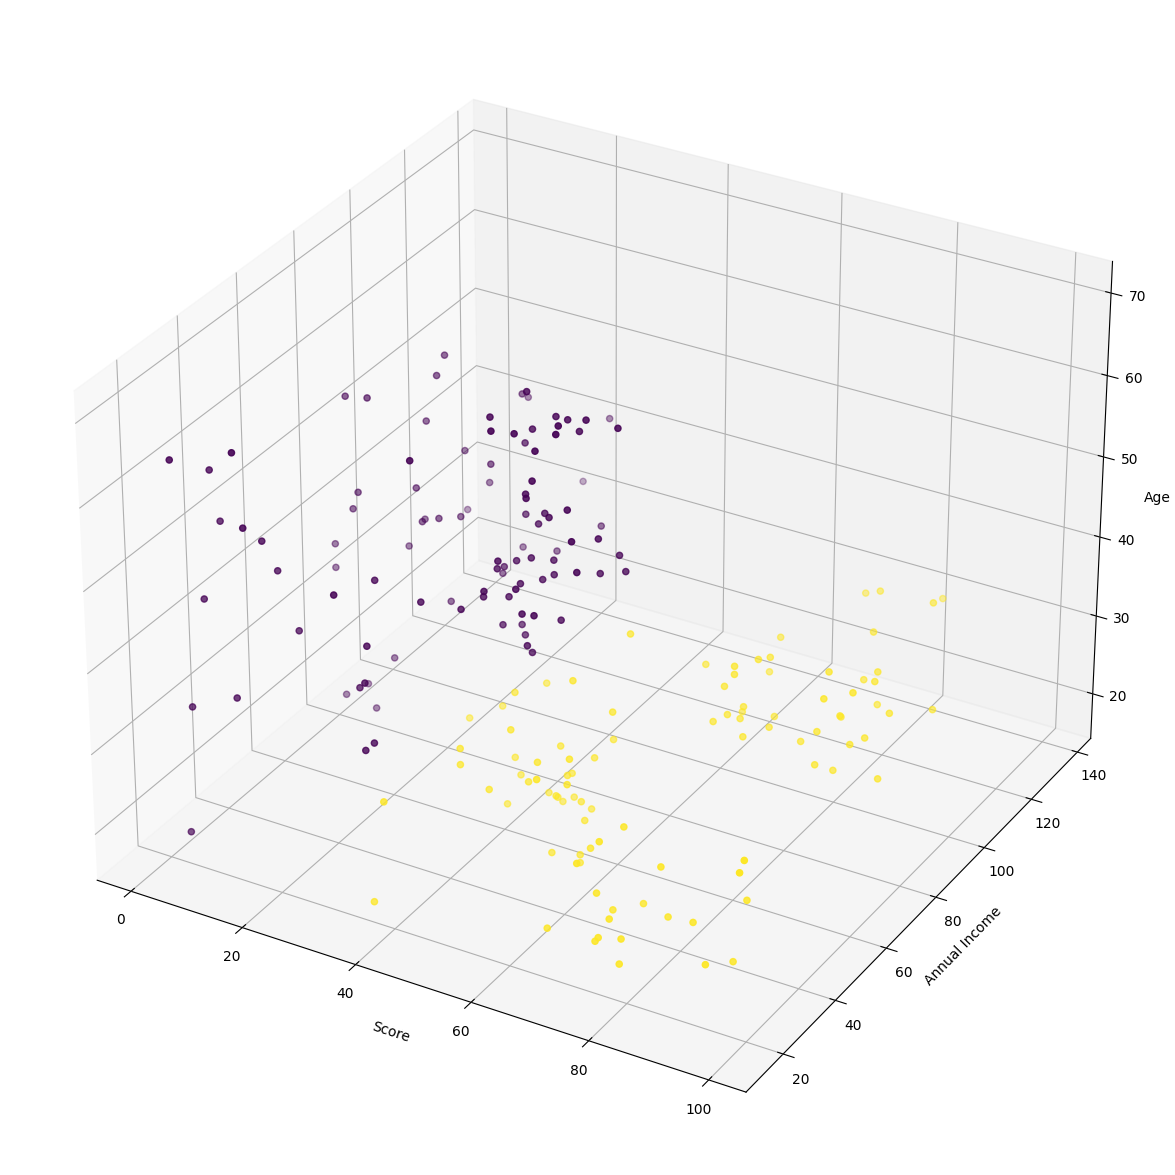

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], df['Age'], marker='o', c=df_2['Class'])
ax.set_xlabel('Score')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Age')

plt.savefig("KMeans_2_Clusters.jpg")
plt.show()

In [ ]:
Kmeans_4 = KMeans(n_clusters=4, n_init=12)
Kmeans_4.fit(new_data)
clusters_4 = Kmeans_4.labels_

In [ ]:
df_4 = df.copy()
df_4['Class'] = clusters_4
df_4

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,0
197,0,32,126,74,1
198,0,32,137,18,1


<Axes: >

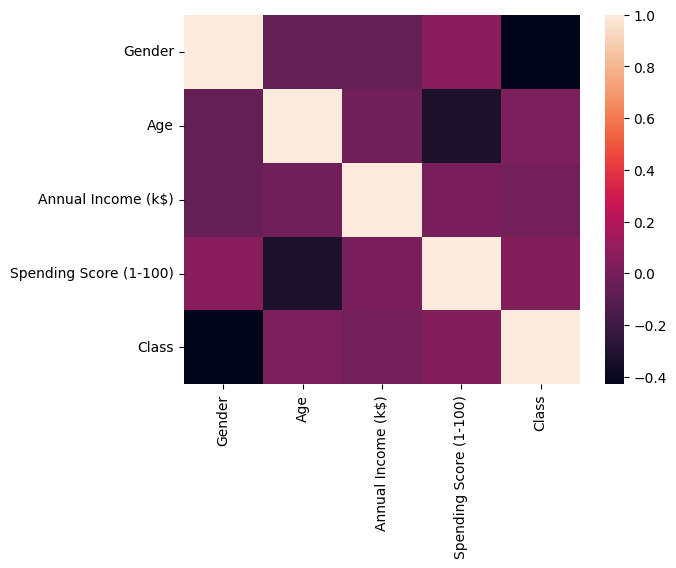

In [ ]:
sns.heatmap(df_4.corr())

In [ ]:
df_4.groupby('Class').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Class,,,,
0,1.0,48.109091,58.818182,34.781818
1,0.0,27.666667,64.933333,64.822222
2,1.0,28.438596,59.666667,67.684211
3,0.0,52.511628,59.395349,31.441860


In [ ]:
sample = df_4.groupby('Class')
for ele in sample:
  print(ele[1].describe())

       Gender        Age  Annual Income (k$)  Spending Score (1-100)  Class
count    55.0  55.000000           55.000000               55.000000   55.0
mean      1.0  48.109091           58.818182               34.781818    0.0
std       0.0   9.836954           25.771856               16.465104    0.0
min       1.0  20.000000           16.000000                5.000000    0.0
25%       1.0  41.500000           41.000000               21.000000    0.0
50%       1.0  49.000000           57.000000               39.000000    0.0
75%       1.0  54.000000           74.000000               48.500000    0.0
max       1.0  68.000000          126.000000               59.000000    0.0
       Gender        Age  Annual Income (k$)  Spending Score (1-100)  Class
count    45.0  45.000000           45.000000               45.000000   45.0
mean      0.0  27.666667           64.933333               64.822222    1.0
std       0.0   6.983747           29.830887               25.197663    0.0
min       0.

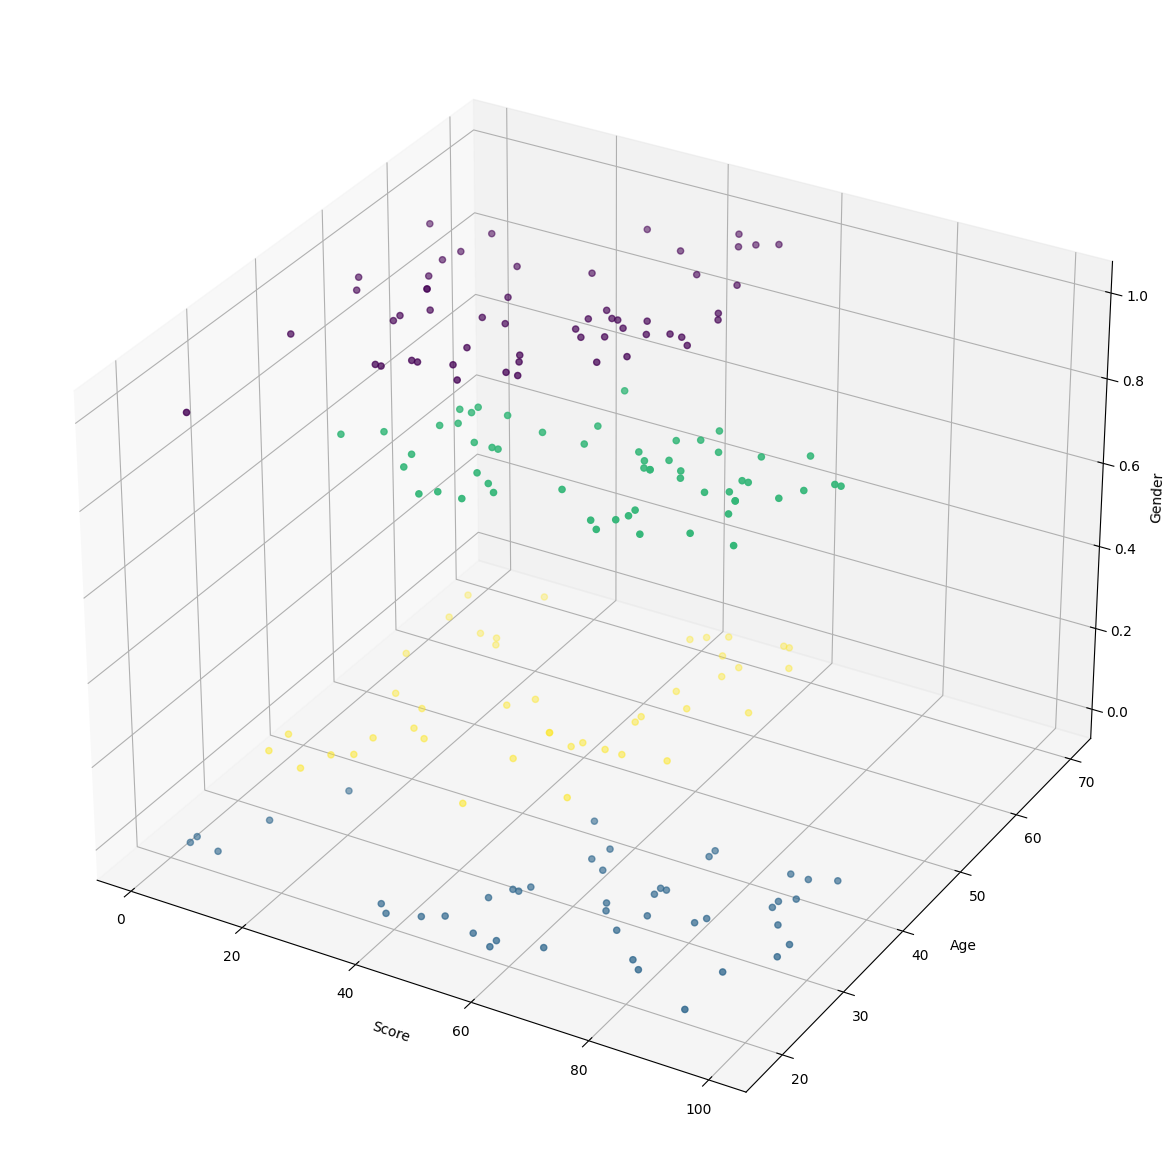

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Spending Score (1-100)'], df['Age'], df['Gender'], marker='o', c=df_4['Class'])
ax.set_xlabel('Score')
ax.set_ylabel('Age')
ax.set_zlabel('Gender')

plt.savefig("KMeans_4_Clusters.jpg")
plt.show()

In [ ]:
Kmeans_8 = KMeans(n_clusters=8, n_init=12)
Kmeans_8.fit(new_data)
clusters_8 = Kmeans_8.labels_

In [ ]:
df_8 = df.copy()
df_8['Class'] = clusters_8
df_8

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,0,19,15,39,5
1,0,21,15,81,5
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,7
196,1,45,126,28,1
197,0,32,126,74,2
198,0,32,137,18,6


In [ ]:
sample_8 = df_8.groupby("Class")
sample_8['Annual Income (k$)'].describe().sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
5,25.0,40.400000,17.358955,15.0,24.00,42.0,54.00,67.0
3,34.0,39.529412,17.052922,16.0,21.50,39.5,56.25,65.0
0,36.0,46.722222,13.741722,18.0,37.75,48.0,58.25,67.0
4,26.0,48.692308,14.529334,19.0,43.00,51.5,61.75,71.0
1,20.0,86.700000,17.429859,64.0,74.50,78.5,99.50,126.0
2,18.0,87.111111,18.929867,69.0,73.50,82.5,91.75,137.0
7,22.0,85.272727,14.286796,69.0,76.25,78.5,94.75,120.0
6,19.0,85.894737,16.110365,71.0,77.00,81.0,87.50,137.0


<Axes: >

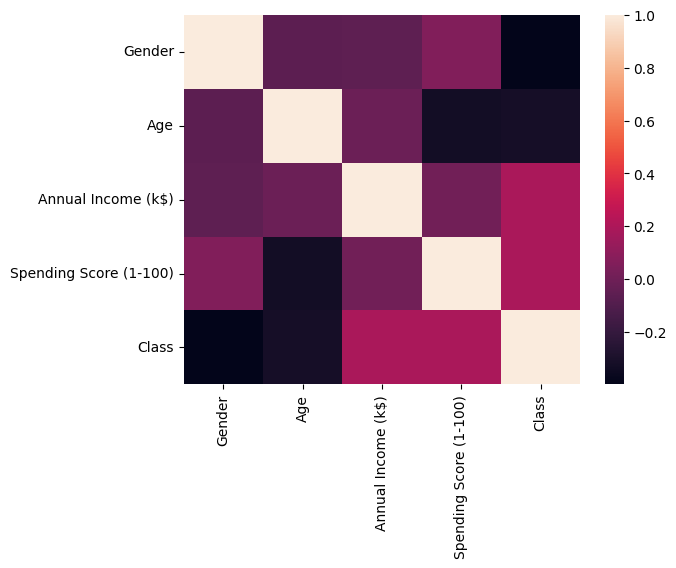

In [ ]:
sns.heatmap(df_8.corr())